1. Load Data & Basic Checks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
df = pd.read_csv(r'C:\Users\nesil\Desktop\odtu-yuksek\DI725_termproject_2030336\data\RISCM\captions.csv')

# Display basic info
print("===== Dataset Info =====")
print(df.info())

# Check first 5 rows
print("\n===== First 5 Rows =====")
print(df.head())

# Check missing values
print("\n===== Missing Values =====")
print(df.isnull().sum())

ModuleNotFoundError: No module named 'wordcloud'

2. Basic Statistics

In [2]:
print("\n===== Basic Statistics =====")
print(f"Total Images: {df['image'].nunique()}")
print(f"Sources: {df['source'].unique()}")
print(f"Splits: {df['split'].unique()}")

# Count of images per source & split
print("\n===== Images per Source =====")
print(df['source'].value_counts())

print("\n===== Images per Split =====")
print(df['split'].value_counts())


===== Basic Statistics =====


NameError: name 'df' is not defined

3. Caption Length Analysis

In [ ]:
# Combine all captions into a single list
all_captions = []
for col in ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']:
    all_captions.extend(df[col].dropna().tolist())

# Calculate word counts
caption_lengths = [len(str(caption).split()) for caption in all_captions]

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(caption_lengths, bins=20, kde=True, color='blue')
plt.title('Distribution of Caption Lengths (Words per Caption)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Summary stats
print("\n===== Caption Length Stats =====")
print(f"Mean words per caption: {pd.Series(caption_lengths).mean():.2f}")
print(f"Median words per caption: {pd.Series(caption_lengths).median()}")
print(f"Max words in a caption: {max(caption_lengths)}")
print(f"Min words in a caption: {min(caption_lengths)}")

4. Word Frequency Analysis

In [ ]:
# Combine all captions into a single string
all_text = ' '.join(all_captions)

# Generate word frequencies
word_counts = Counter(all_text.lower().split())
top_words = word_counts.most_common(20)

# Plot top words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette='viridis')
plt.title('Top 20 Most Frequent Words in Captions')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Captions')
plt.show()

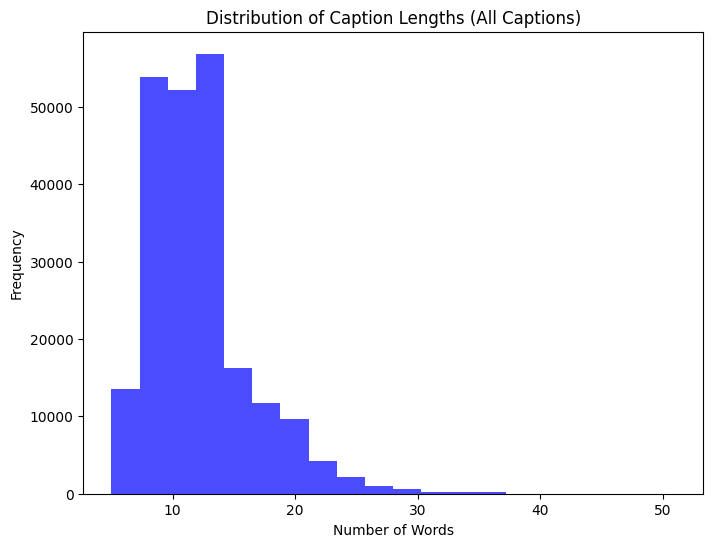

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'C:\Users\nesil\Desktop\odtu-yuksek\DI725_termproject_2030336\data\RISCM\captions.csv')

# Combine all captions into a single list
all_captions = []
for col in ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']:
    all_captions.extend(df[col].tolist())

# Calculate word counts
caption_lengths = [len(str(caption).split()) for caption in all_captions]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(caption_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Caption Lengths (All Captions)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

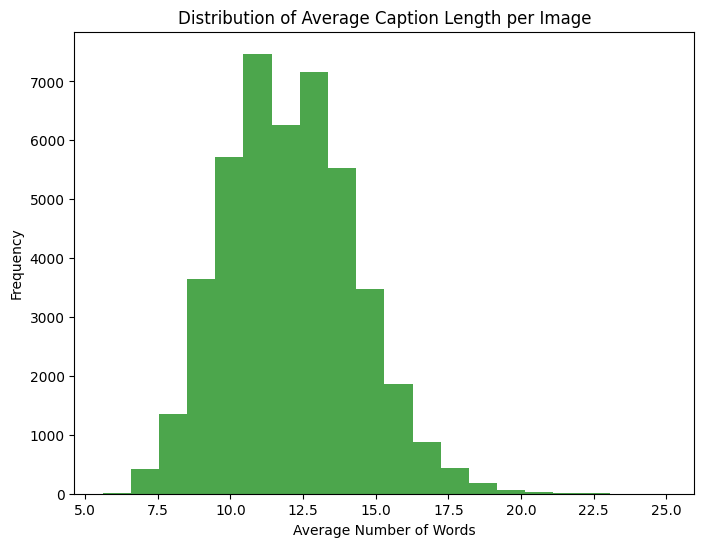

In [6]:
# Calculate average caption length per image
df['avg_caption_length'] = df[['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']] \
    .apply(lambda row: sum(len(str(caption).split()) for caption in row) / 5, axis=1)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['avg_caption_length'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Average Caption Length per Image')
plt.xlabel('Average Number of Words')
plt.ylabel('Frequency')
plt.show()

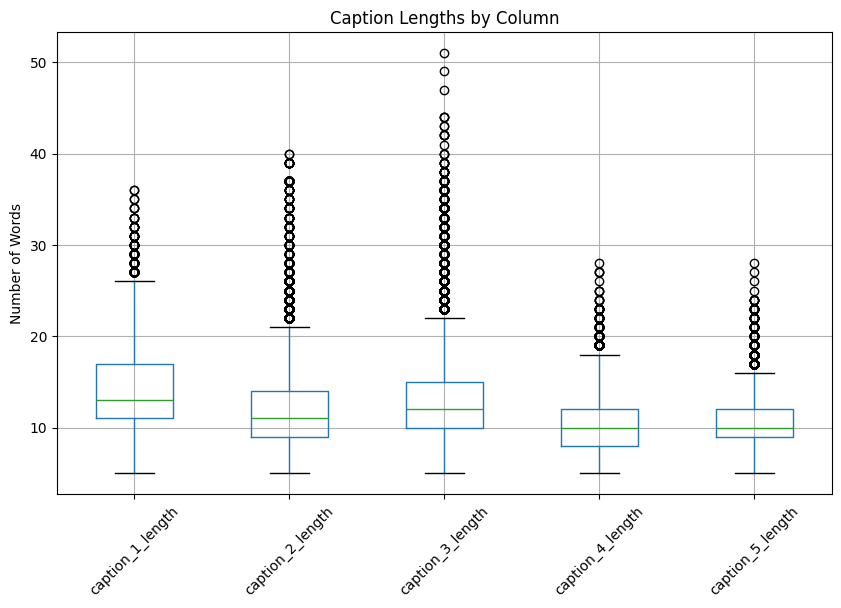

In [7]:
# Calculate word counts for each caption column
for col in ['caption_1', 'caption_2', 'caption_3', 'caption_4', 'caption_5']:
    df[f'{col}_length'] = df[col].apply(lambda x: len(str(x).split()))

# Plot boxplot for comparison
plt.figure(figsize=(10, 6))
df.boxplot(column=['caption_1_length', 'caption_2_length', 'caption_3_length', 'caption_4_length', 'caption_5_length'])
plt.title('Caption Lengths by Column')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.show()